In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
# ^^^ pyforest auto-imports - don't write above this line
from pyforest import *
lazy_imports()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#load dataset
df = pd.read_csv("framingham.csv")

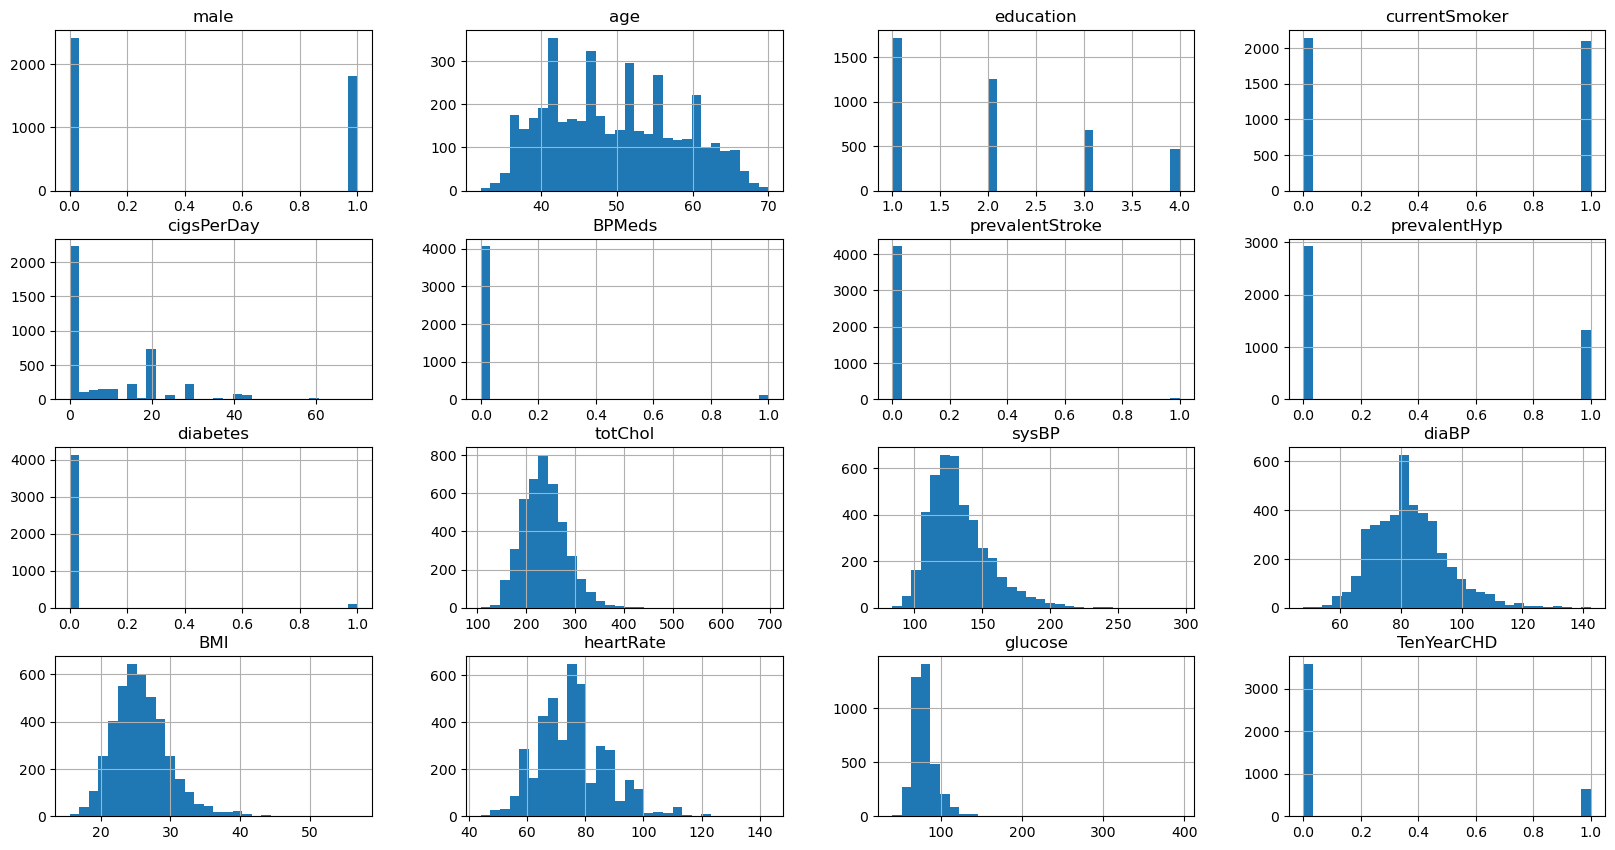

In [4]:
#get familiar with the dataset 
df.hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

## Data cleaning and preparation

In [5]:
# Check 5 rows of data set
df.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# Check number of columns and rows in data frame
df.shape 

(4238, 16)

### Scaling data

In [7]:
# check for column that is not discrete to scale data

#all-columns list
df_all_colum=list(df.columns)

# discrete/categorical column list
discrete_cols=list(df.columns[df.round(decimals=0).isin([0,1]).all()])
discrete_cols.append('education')
discrete_cols.append('BPMeds')

#continuous column list
continuous_cols=list()
for i in df_all_colum:
    if i not in discrete_cols:
        if i not in['education', 'BPMeds']:
            continuous_cols.append(i)

In [8]:
#check if the two list are correct
print('Discrete cols: ', discrete_cols), print('Continuous cols:', continuous_cols)

Discrete cols:  ['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'education', 'BPMeds']
Continuous cols: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


(None, None)

In [9]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

#scale continuous columns data
array_scaled = scaler.fit_transform(df[continuous_cols])

#turn array scaled to dataframe 
df_scaled_cols = pd.DataFrame(array_scaled, columns = [df[continuous_cols]])

#create a complete scaled data
df_scaled = df[df_all_colum]
df_scaled[continuous_cols] = df_scaled_cols[continuous_cols]

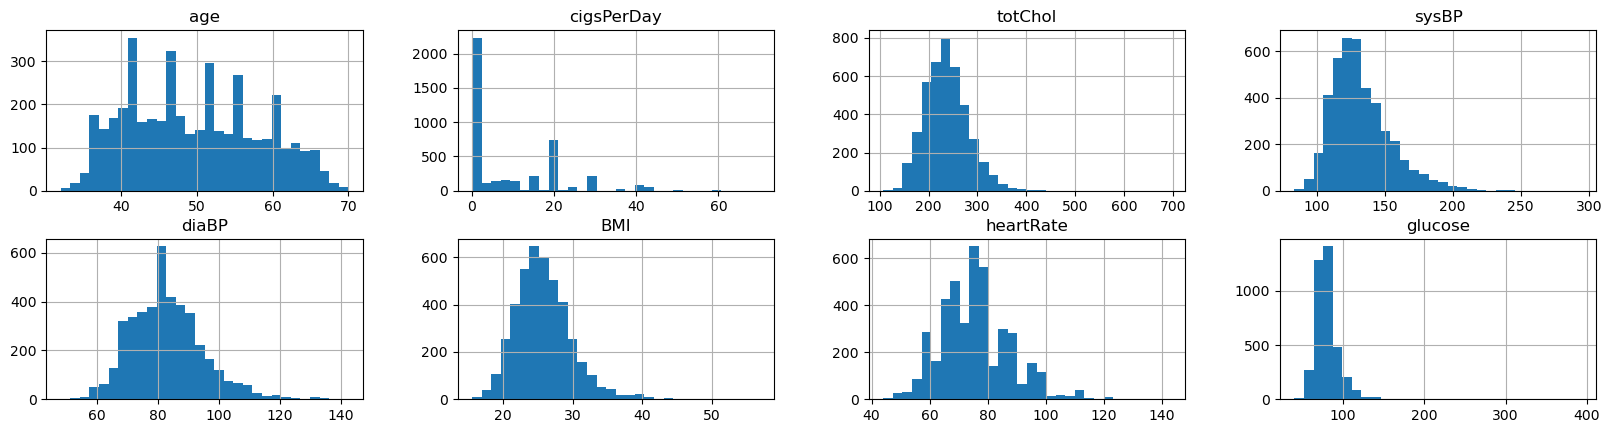

In [10]:
#datafram before scaling
df[continuous_cols].hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

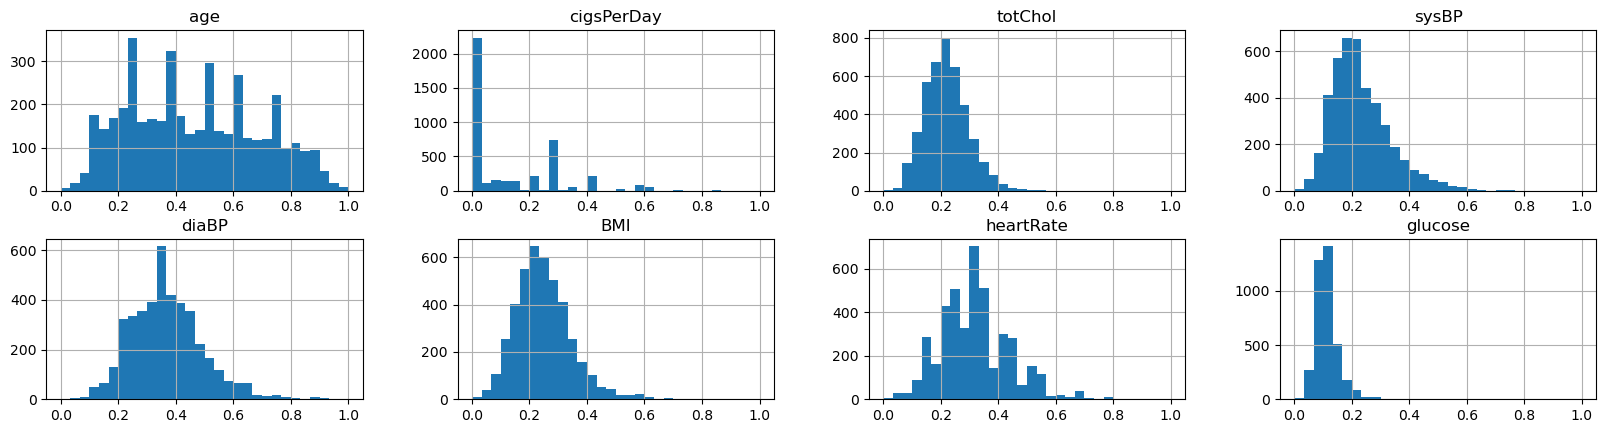

In [11]:
#datafram after scaling
df_scaled[continuous_cols].hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

### Handling duplicate data 

In [12]:
df_scaled.drop_duplicates()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,4.0,0,0.000000,0.0,0,0,0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,2.0,0,0.000000,0.0,0,0,0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,1.0,1,0.285714,0.0,0,0,0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,3.0,1,0.428571,0.0,0,1,0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,3.0,1,0.328571,0.0,0,0,0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,0.473684,1.0,1,0.014286,0.0,0,1,0,0.349745,0.451537,0.465608,0.252787,0.222222,0.129944,1
4234,1,0.500000,3.0,1,0.614286,0.0,0,0,0,0.169779,0.203310,0.338624,0.101066,0.212121,0.079096,0
4235,0,0.421053,2.0,1,0.285714,NaN,0,0,0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944,0
4236,0,0.315789,1.0,1,0.214286,0.0,0,0,0,0.174873,0.203310,0.412698,0.087736,0.424242,NaN,0


### Handling missing data

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [14]:
#check if there are any null value in dataset 
df_scaled.isnull().sum() 
df_scaled.isnull().sum().sum()

645

'\nthe visualization(matrix) does not show any obvious pattern or cluster in the missing \nvalues, hence, we assume that our data is missing completely at random(MCAR)\n'

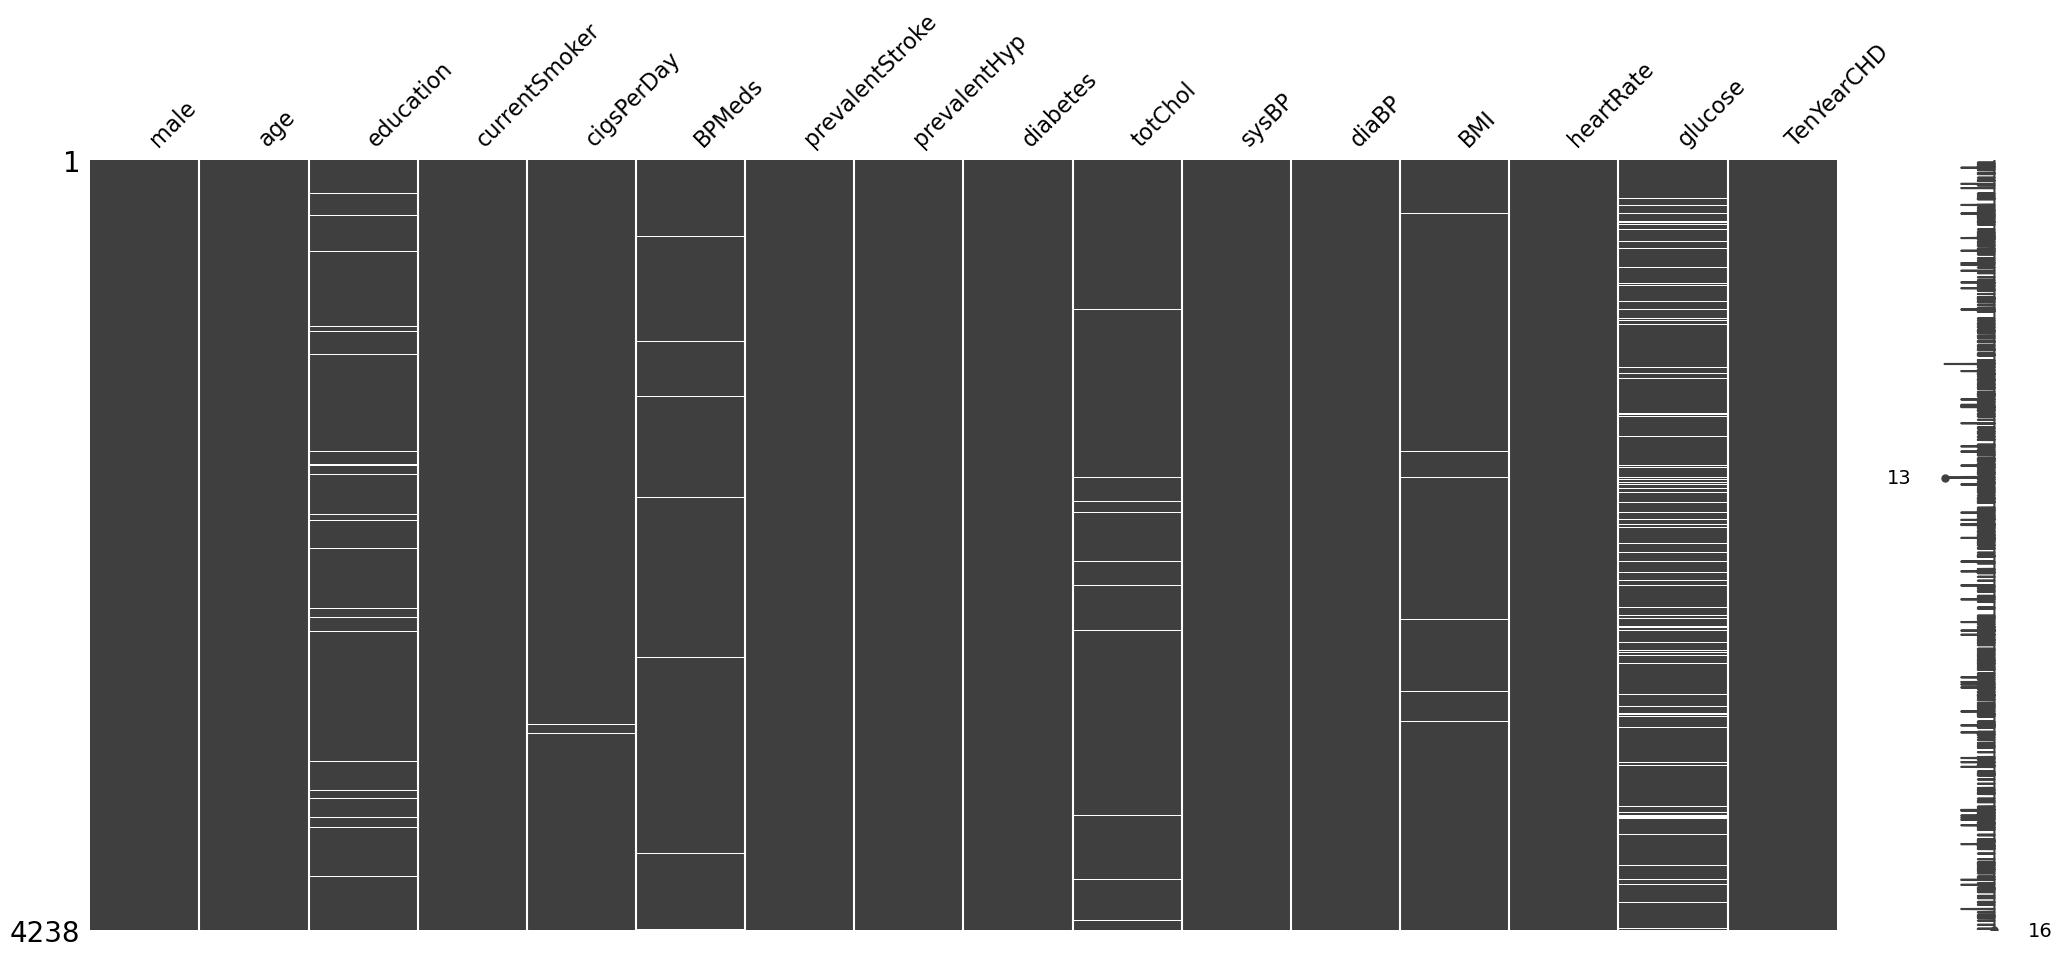

In [15]:
#see if there is any pattern in missing values 
import missingno as msno
msno.matrix(df_scaled)

'''
the visualization(matrix) does not show any obvious pattern or cluster in the missing 
values, hence, we assume that our data is missing completely at random(MCAR)
'''

'\nThere seem to be an insignificant correlation between our missing value in colum(tochol)\nand column(heartRate). Thus, this reinforce our assumption that our missing value is missing completely \nat random (MCAR)\n'

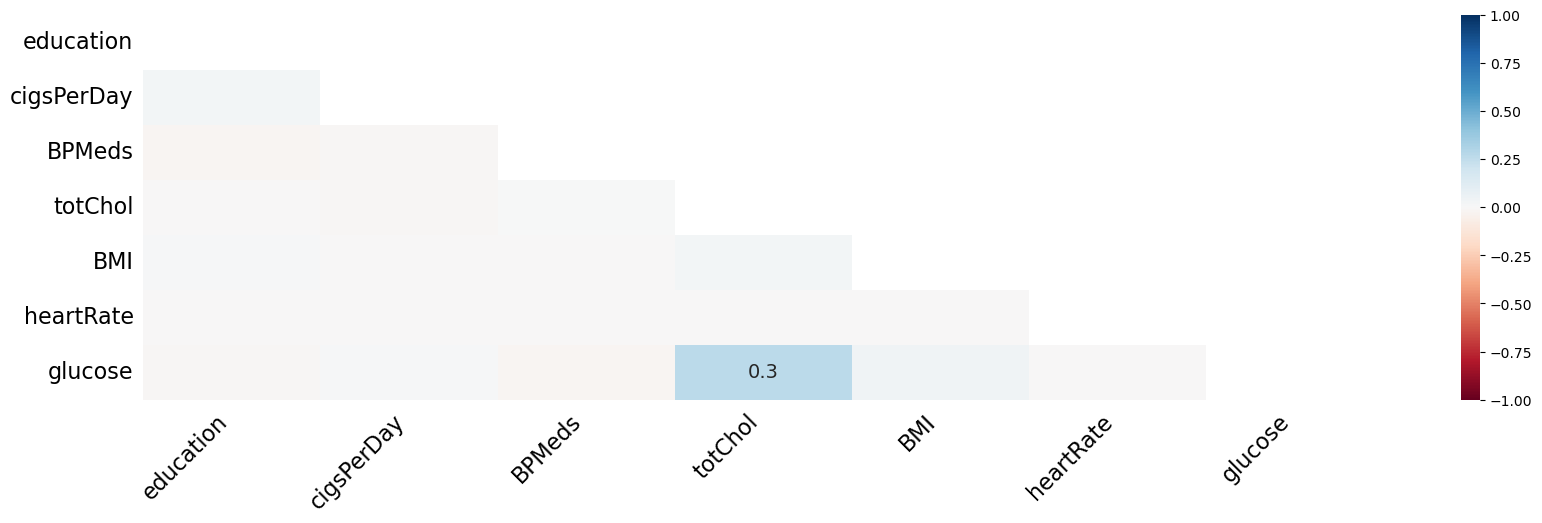

In [16]:
#see if there is any correlation between missing values 
msno.heatmap(df_scaled, figsize=(20, 5))
'''
There seem to be an insignificant correlation between our missing value in colum(tochol)
and column(heartRate). Thus, this reinforce our assumption that our missing value is missing completely 
at random (MCAR)
'''

In [17]:
#As we confirm that our missing value is MCAR, we will use iterative imputing to fill in NA value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#iterative imputer module, impute on the scaled dataset
imputer = IterativeImputer()
df_impute = imputer.fit_transform(df_scaled)

#impute dataframe 
df_impute = pd.DataFrame(data=df_impute, columns=df.columns)

In [18]:
#double check for missing value
df_impute.isnull().values.any()

False

<Axes: >

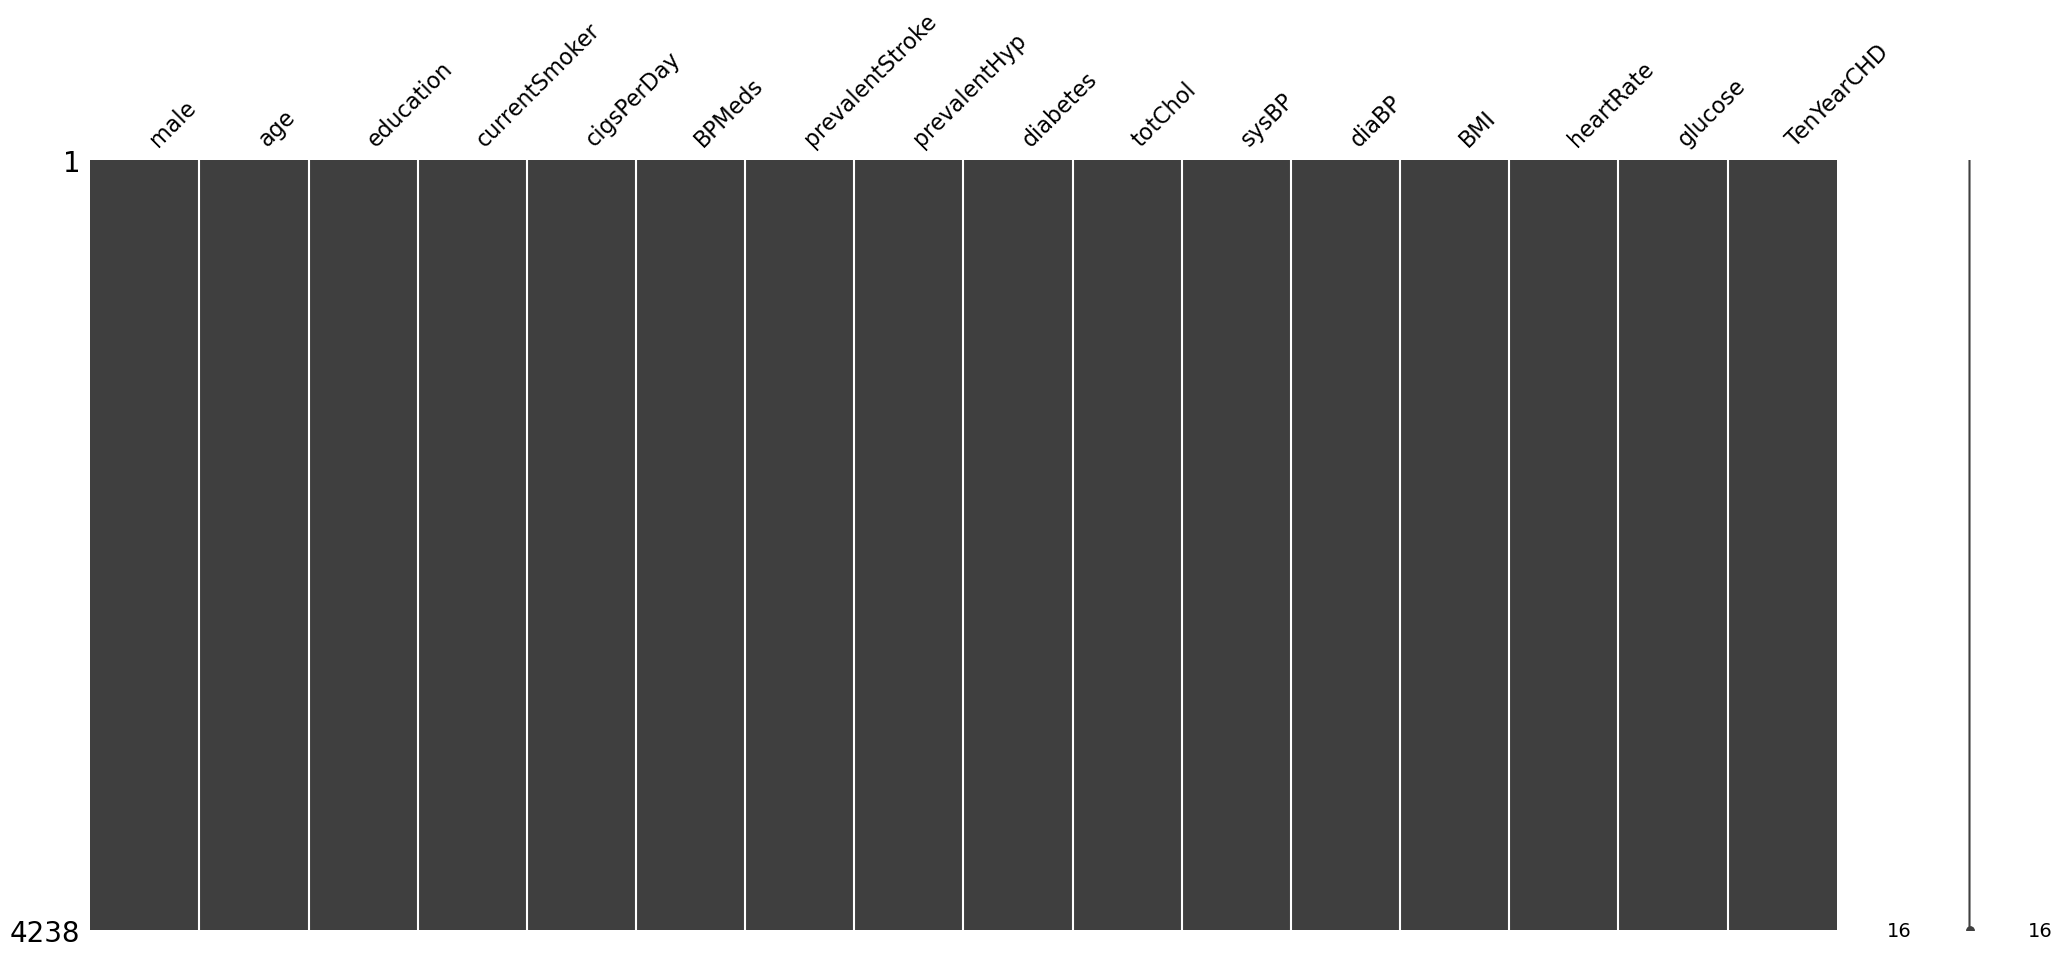

In [19]:
#visualize to see if there are still missing data
msno.matrix(df_impute)

In [20]:
#after imputing, sometime data isn't rounded correctly
#BPMeds  
df_impute['BPMeds'] = df_impute['BPMeds'].round(decimals=0) 
df_impute['BPMeds'].value_counts()
#education  
df_impute['education'] = df_impute['education'].round(decimals=0) 
df_impute['education'].value_counts()

1.0    1724
2.0    1354
3.0     687
4.0     473
Name: education, dtype: int64

### Handling ouliers

In [21]:
from sklearn.model_selection import train_test_split

#Separate label (y) and predictor (X)
X = df_impute.drop('TenYearCHD', axis=1)
y = df_impute['TenYearCHD']

#Split the data set for winsorization (onliy winsorize on the train set and NOT on the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#check 
print('X_train:',X_train.shape,', X_test:', X_test.shape)

X_train: (3390, 15) , X_test: (848, 15)


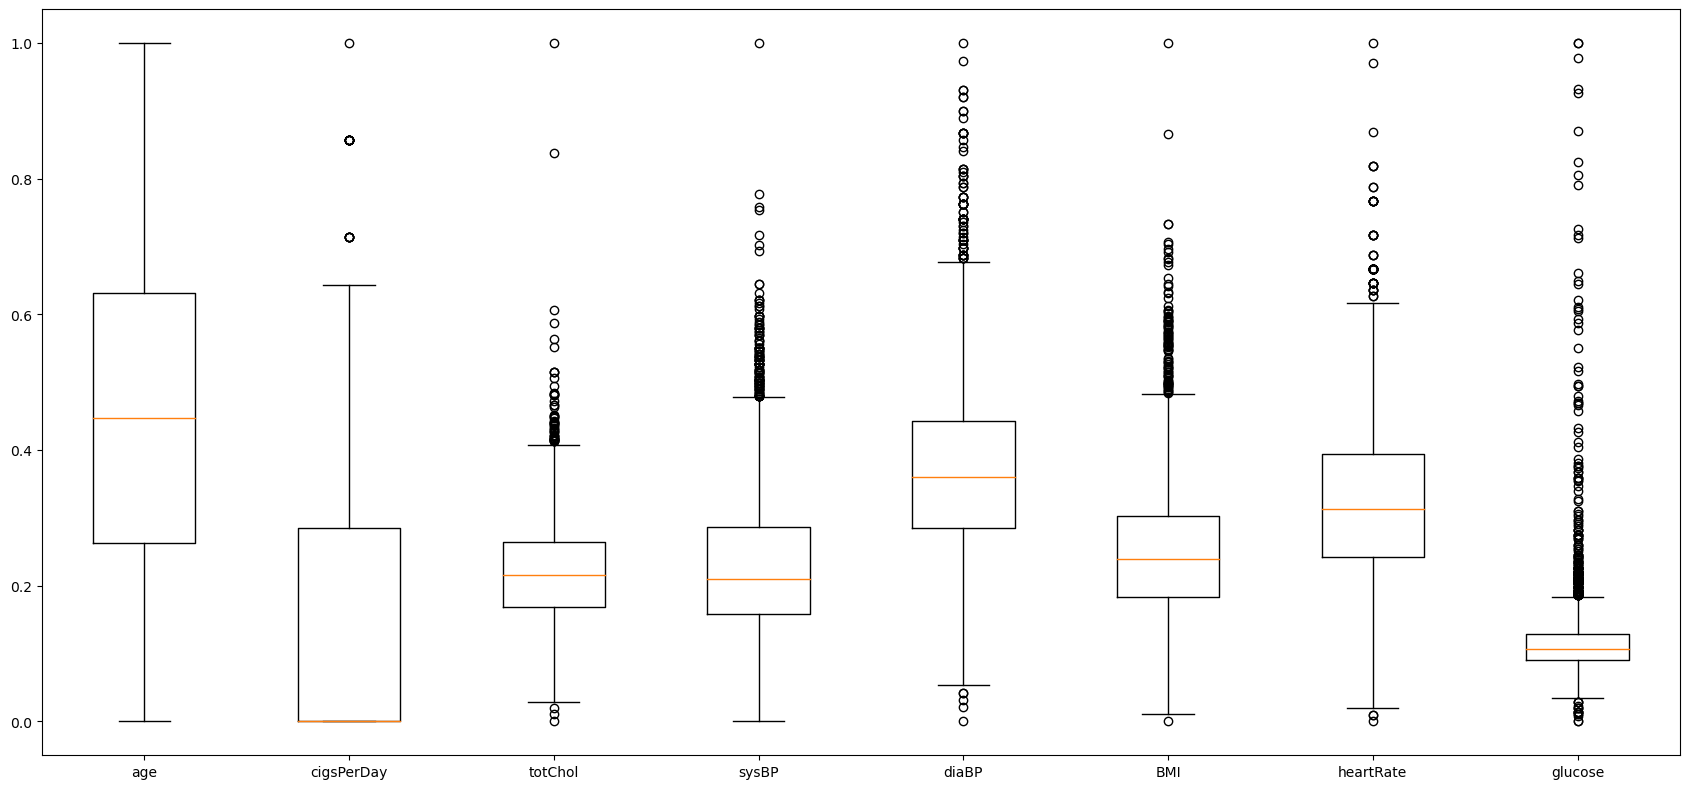

In [22]:
#visualize outlier (before winsorization)
plt.rcParams["figure.figsize"] = [17, 8]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(x=df_impute[continuous_cols]);
plt.xticks(ticks=range(1,9), labels=np.array(continuous_cols));

In [23]:
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

#Winzorize the 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' , 'cigPerDay' columns
totChol_wins = mstats.winsorize(X_train['totChol'], limits=[0.02, 0.009])
sysBP_wins = mstats.winsorize(X_train['sysBP'], limits=[0.02, 0.03])
diaBP_wins = mstats.winsorize(X_train['diaBP'], limits=[0.02, 0.01])
BMI_wins = mstats.winsorize(X_train['BMI'], limits=[0.02, 0.01])
heartRate_wins = mstats.winsorize(X_train['heartRate'], limits=[0.03, 0.01])
glucose_wins = mstats.winsorize(X_train['glucose'], limits=[0.02, 0.02])
cigsPerDay_wins = mstats.winsorize(X_train['cigsPerDay'], limits=[0.02, 0.01])

# Add the winsorized 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'Glucose' columns back to the train DataFrame
X_train['totChol'] = totChol_wins
X_train['sysBP'] = sysBP_wins
X_train['diaBP'] = diaBP_wins
X_train['BMI'] = BMI_wins
X_train['heartRate'] = heartRate_wins
X_train['glucose'] =glucose_wins
X_train['cigsPerDay'] =cigsPerDay_wins


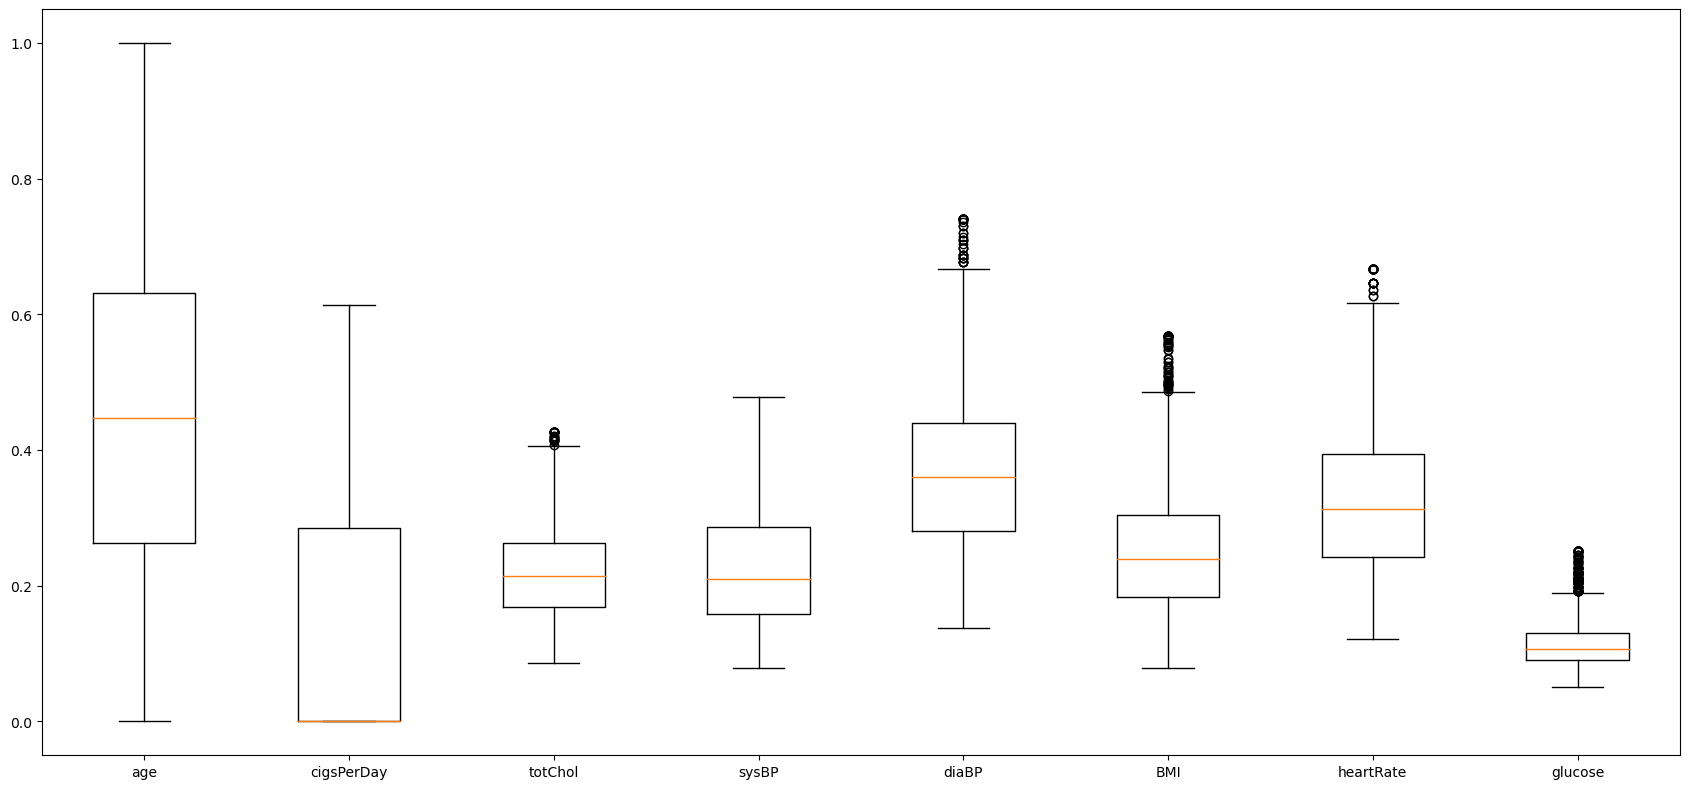

In [24]:
# visualize outlier (after winsorization)
plt.boxplot(x=X_train[continuous_cols]);
plt.xticks(ticks=range(1,9), labels=np.array(continuous_cols));

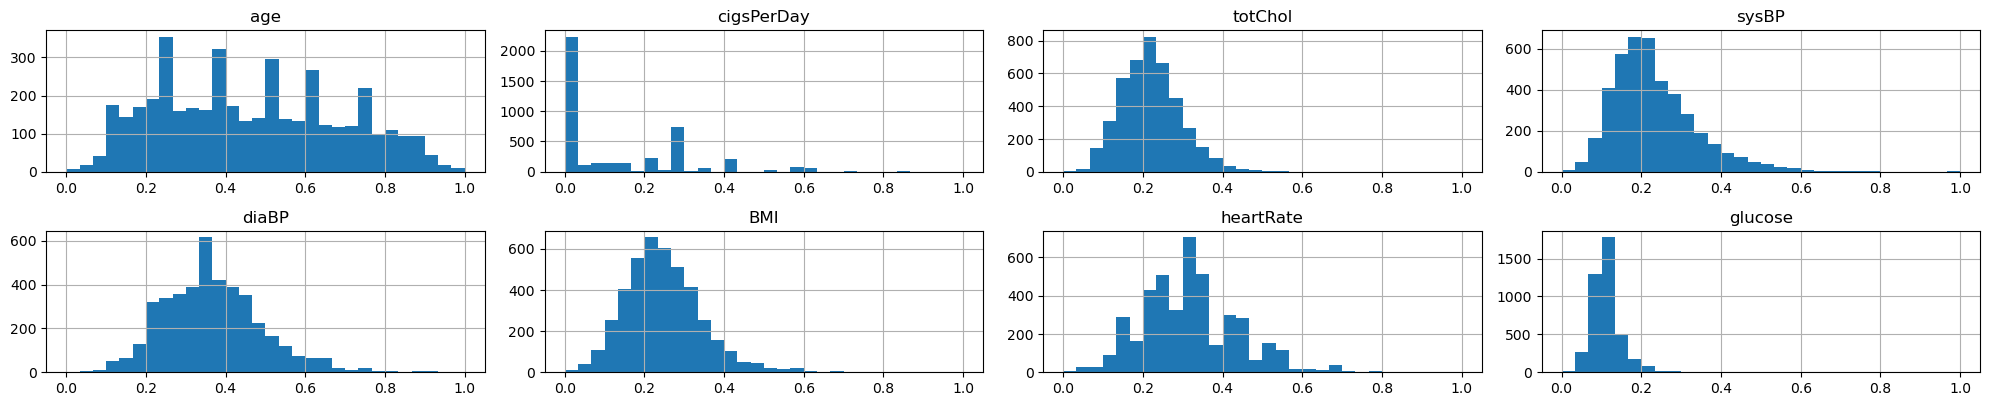

In [25]:
# oulier distribution before winsorization
df_impute[continuous_cols].hist(bins=30, 
               figsize=(20,30),
               layout=(15,4));

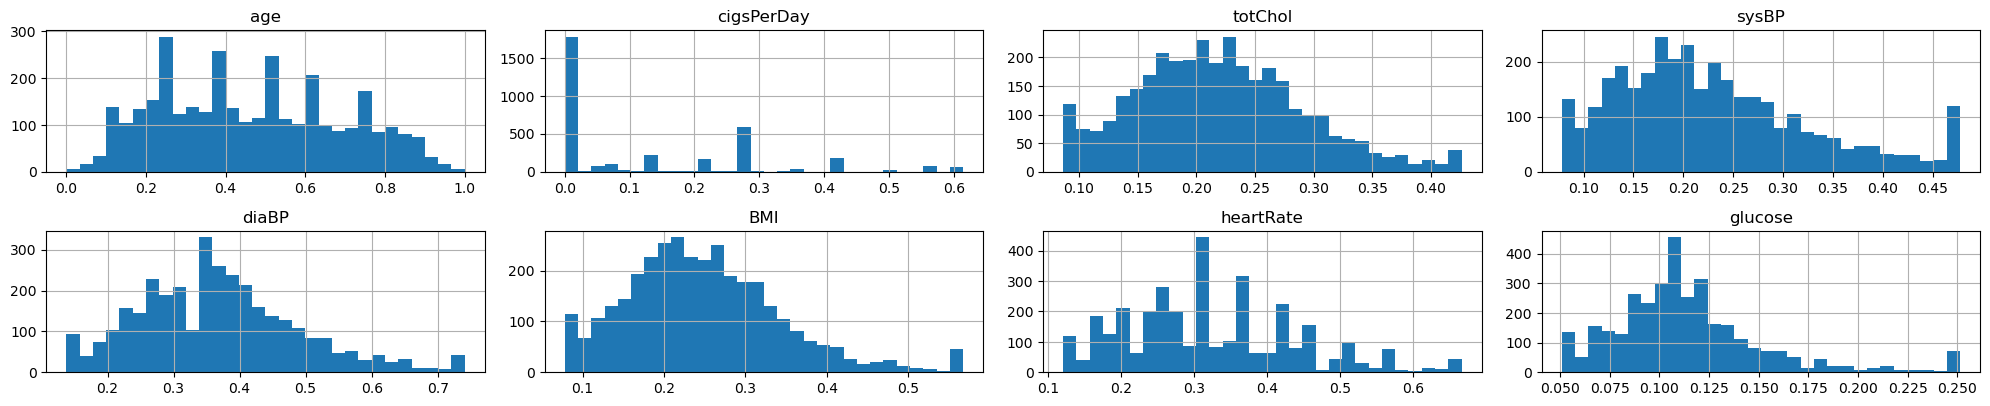

In [26]:
# oulier distribution after winsorization
X_train[continuous_cols].hist(bins=30, 
               figsize=(20,30),
               layout=(15,4));

### Handling imbalanced data

In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
#SMOTE-tomek (SMOTE-Tomek is a combination of oversampling (SMOTE) and undersampling (Tomek links) techniques)
from imblearn.combine import SMOTETomek

#Create the SMOTE-tomek variable 
smote_tomek = SMOTETomek(random_state=42)

#Applie SMOTE-tomek to train data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

#Original train dataset 
X_train.count(), y_train.value_counts()

(male               3390
 age                3390
 education          3390
 currentSmoker      3390
 cigsPerDay         3390
 BPMeds             3390
 prevalentStroke    3390
 prevalentHyp       3390
 diabetes           3390
 totChol            3390
 sysBP              3390
 diaBP              3390
 BMI                3390
 heartRate          3390
 glucose            3390
 dtype: int64,
 0.0    2875
 1.0     515
 Name: TenYearCHD, dtype: int64)

<Axes: >

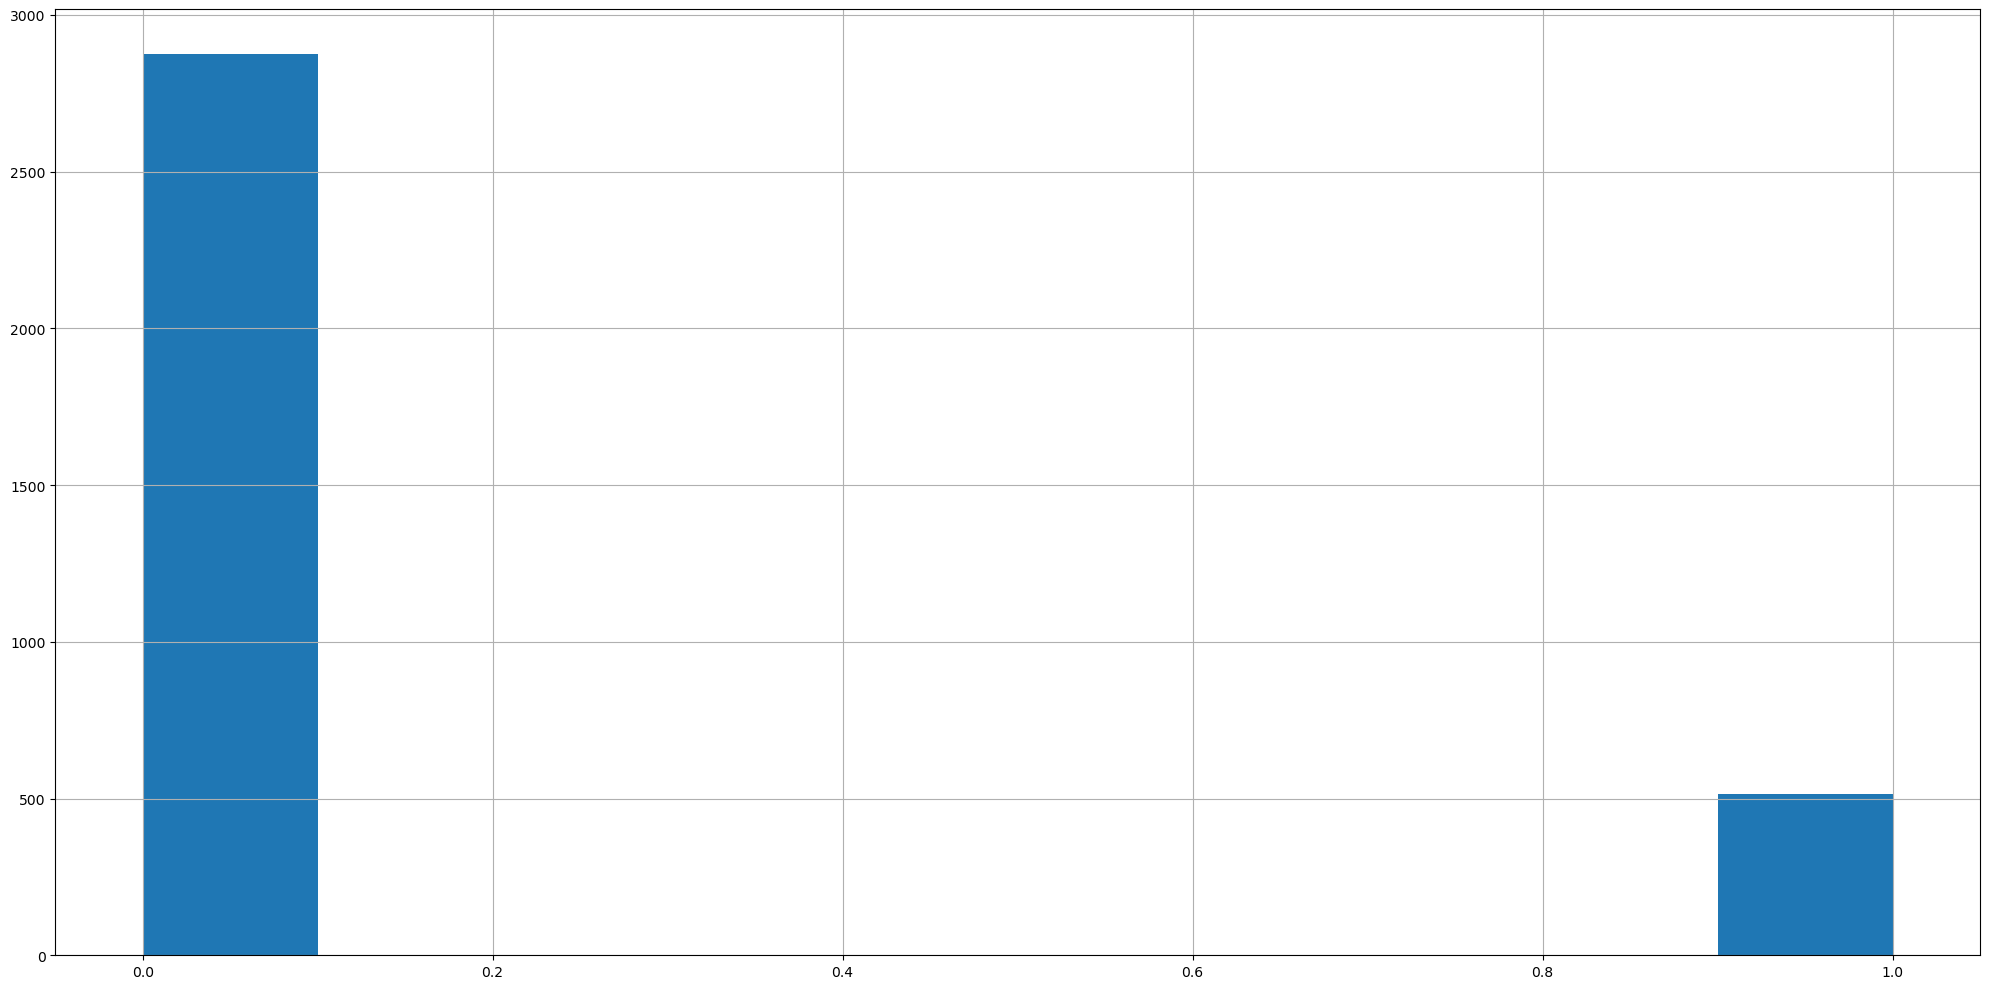

In [29]:
#visualize original imbalanced data
y_train.hist(figsize=(20,10))

In [30]:
#Resample train dataset 
X_train_resampled.count(), y_train_resampled.value_counts()

(male               5674
 age                5674
 education          5674
 currentSmoker      5674
 cigsPerDay         5674
 BPMeds             5674
 prevalentStroke    5674
 prevalentHyp       5674
 diabetes           5674
 totChol            5674
 sysBP              5674
 diaBP              5674
 BMI                5674
 heartRate          5674
 glucose            5674
 dtype: int64,
 0.0    2837
 1.0    2837
 Name: TenYearCHD, dtype: int64)

<Axes: >

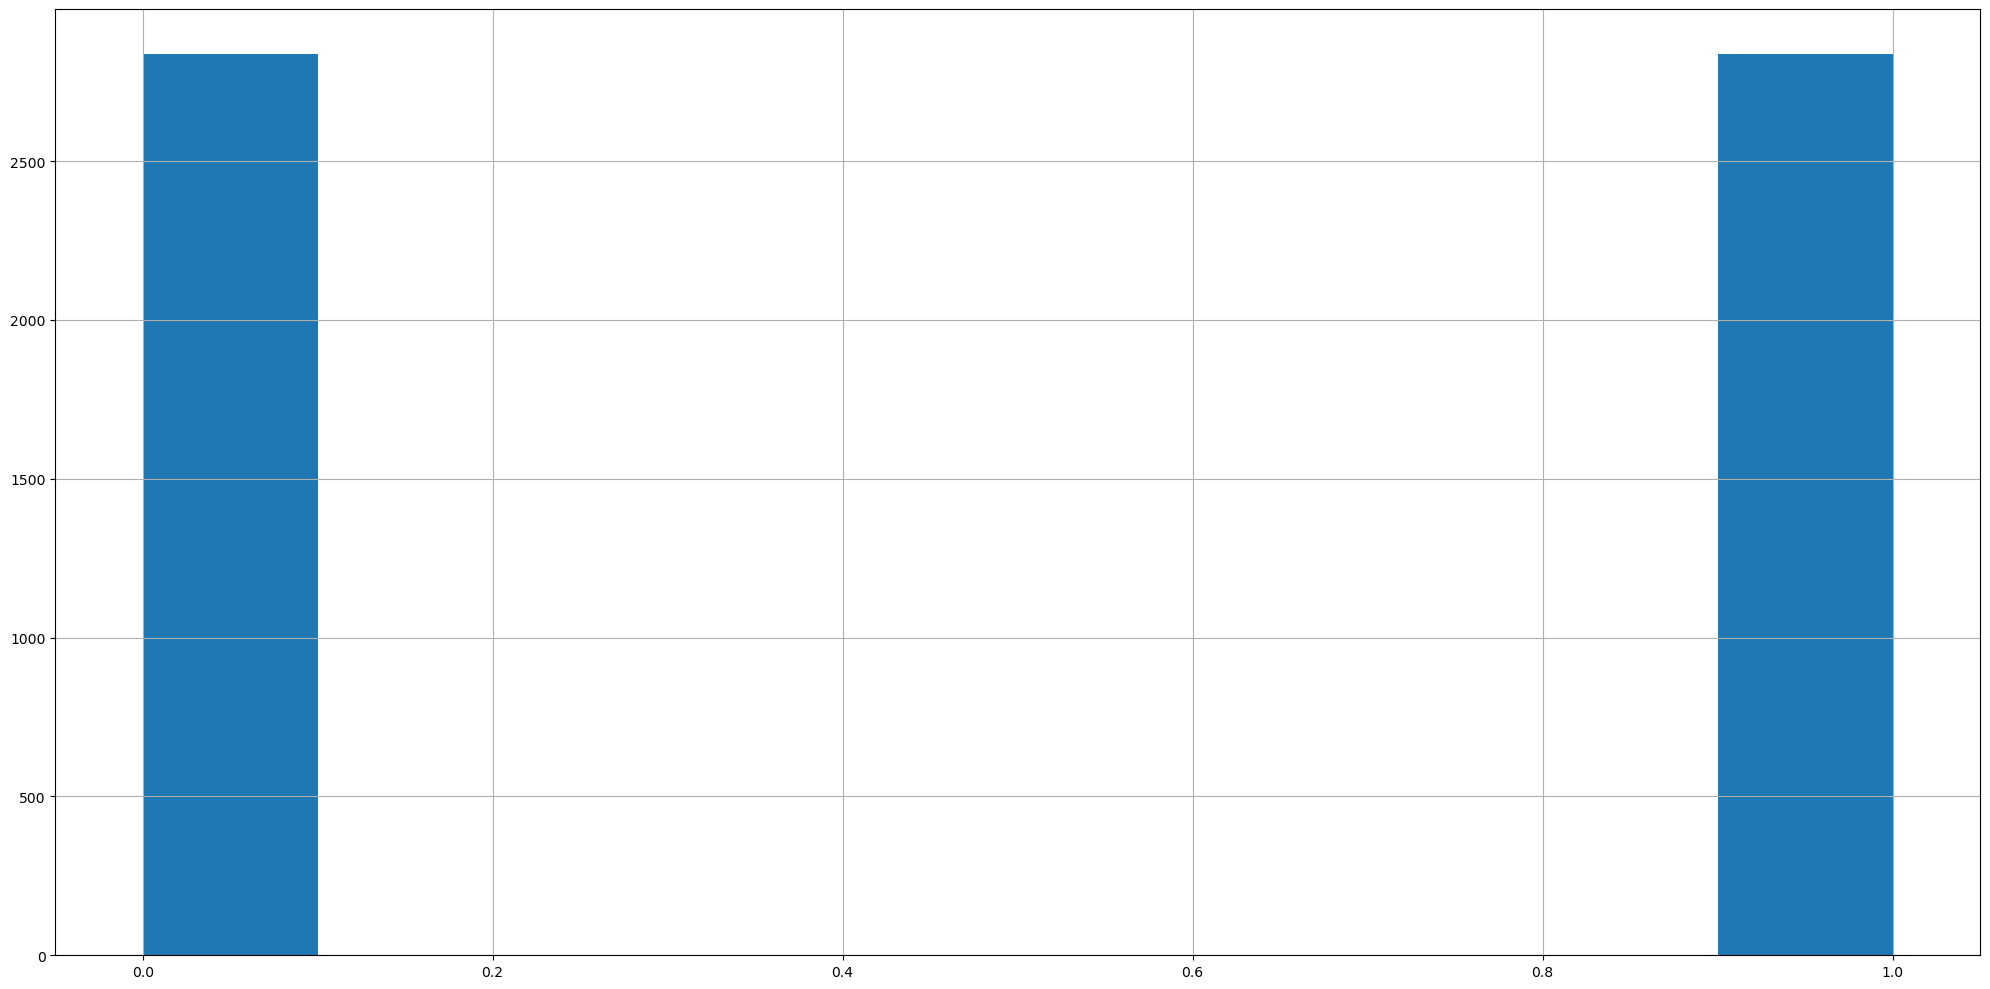

In [31]:
#visualize balanced data after SMOTE-tomek
y_train_resampled.hist(figsize=(20,10))

## Feature Selection

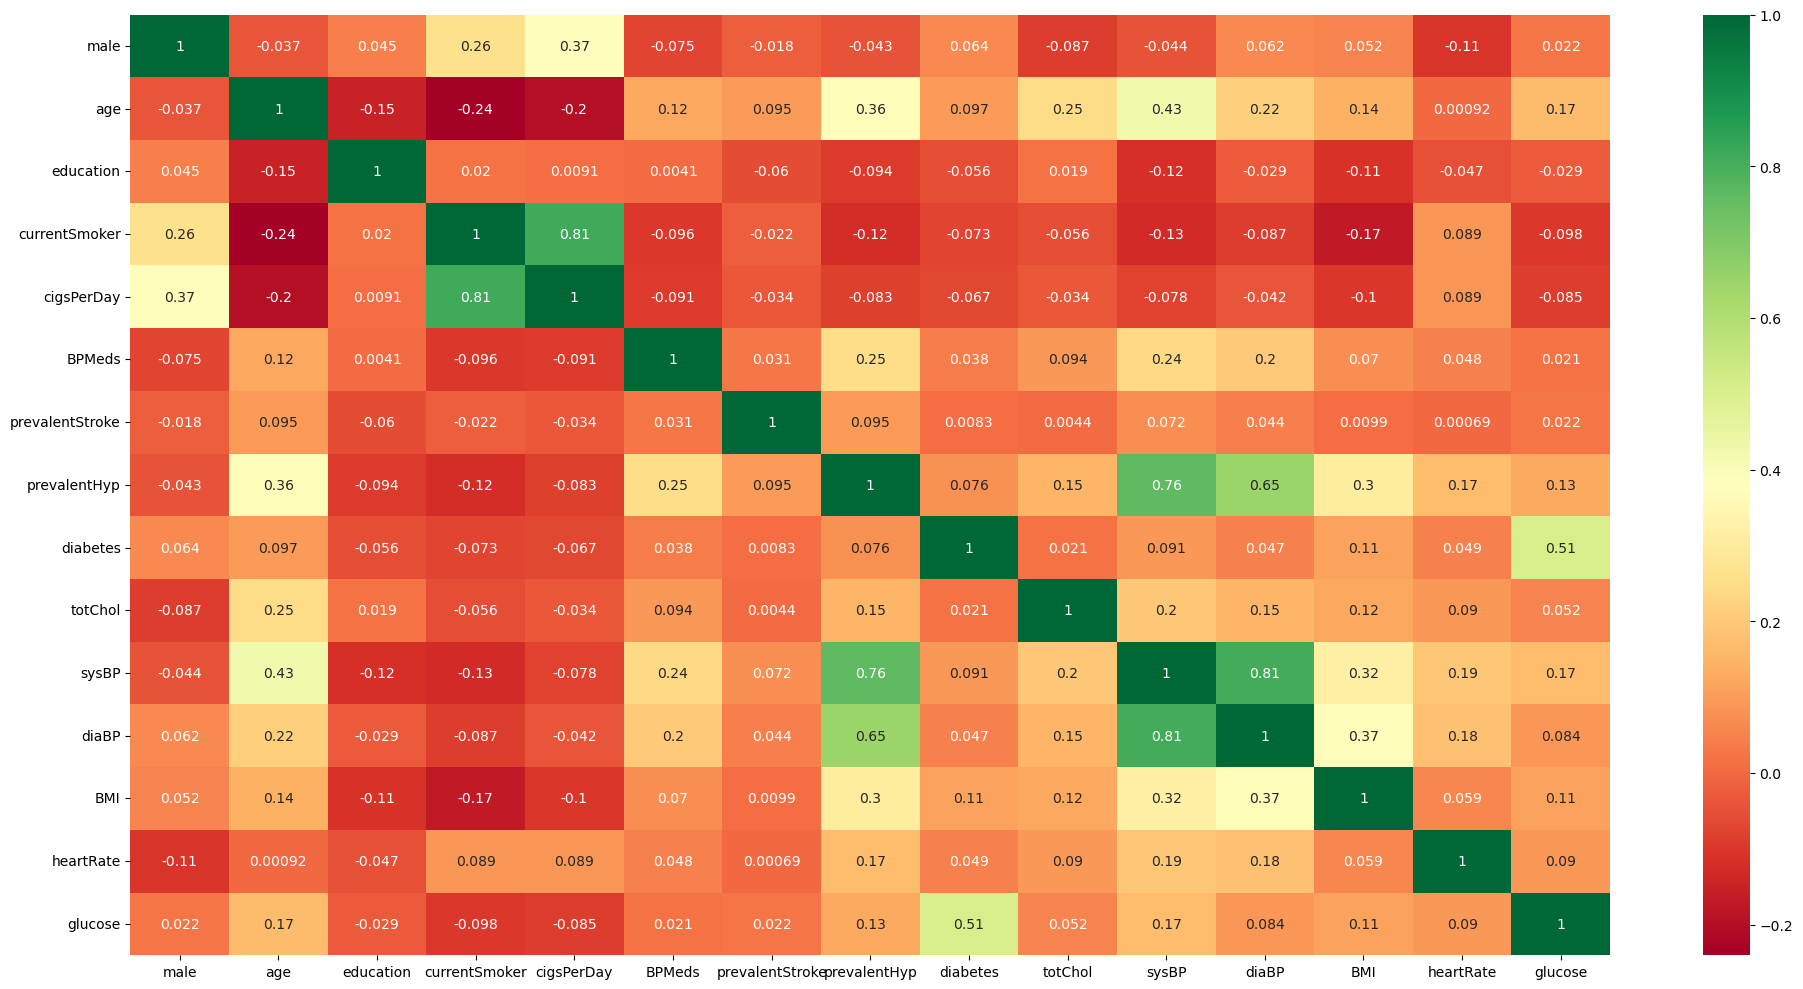

In [32]:
import seaborn as sns 

#visualize features
corrmat= X_train_resampled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(X_train_resampled[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# remove label column from bianry(categorical) list
discrete_cols.remove('TenYearCHD')

#calculating chi2 score for CATEGORICAL variables
bestfeature = SelectKBest(score_func=chi2, k=7)
fit = bestfeature.fit(X_train_resampled[discrete_cols], y_train_resampled)

# Pass the result into a dataframe
dfp_values = pd.DataFrame(fit.pvalues_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_resampled[discrete_cols].columns)
featureScores = pd.concat([dfcolumns,dfscores,dfp_values],axis=1)
featureScores.columns = ['Specs','Score','p-value']  
featureScores_largest = featureScores.nlargest(7,'Score') 
print(featureScores.nlargest(7,'Score'))

             Specs       Score       p-value
3     prevalentHyp  184.841856  4.249348e-42
0             male   39.217340  3.791580e-10
6           BPMeds   37.083337  1.131868e-09
4         diabetes   29.810652  4.763675e-08
5        education   17.420154  2.996321e-05
2  prevalentStroke   16.942421  3.853083e-05
1    currentSmoker    1.450073  2.285162e-01


In [34]:
#my feature list
feature_list = list(X_train_resampled.columns)
feature_list.remove('education') 
feature_list.remove('currentSmoker')
feature_list.remove('glucose')

feature_list

['male',
 'age',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate']

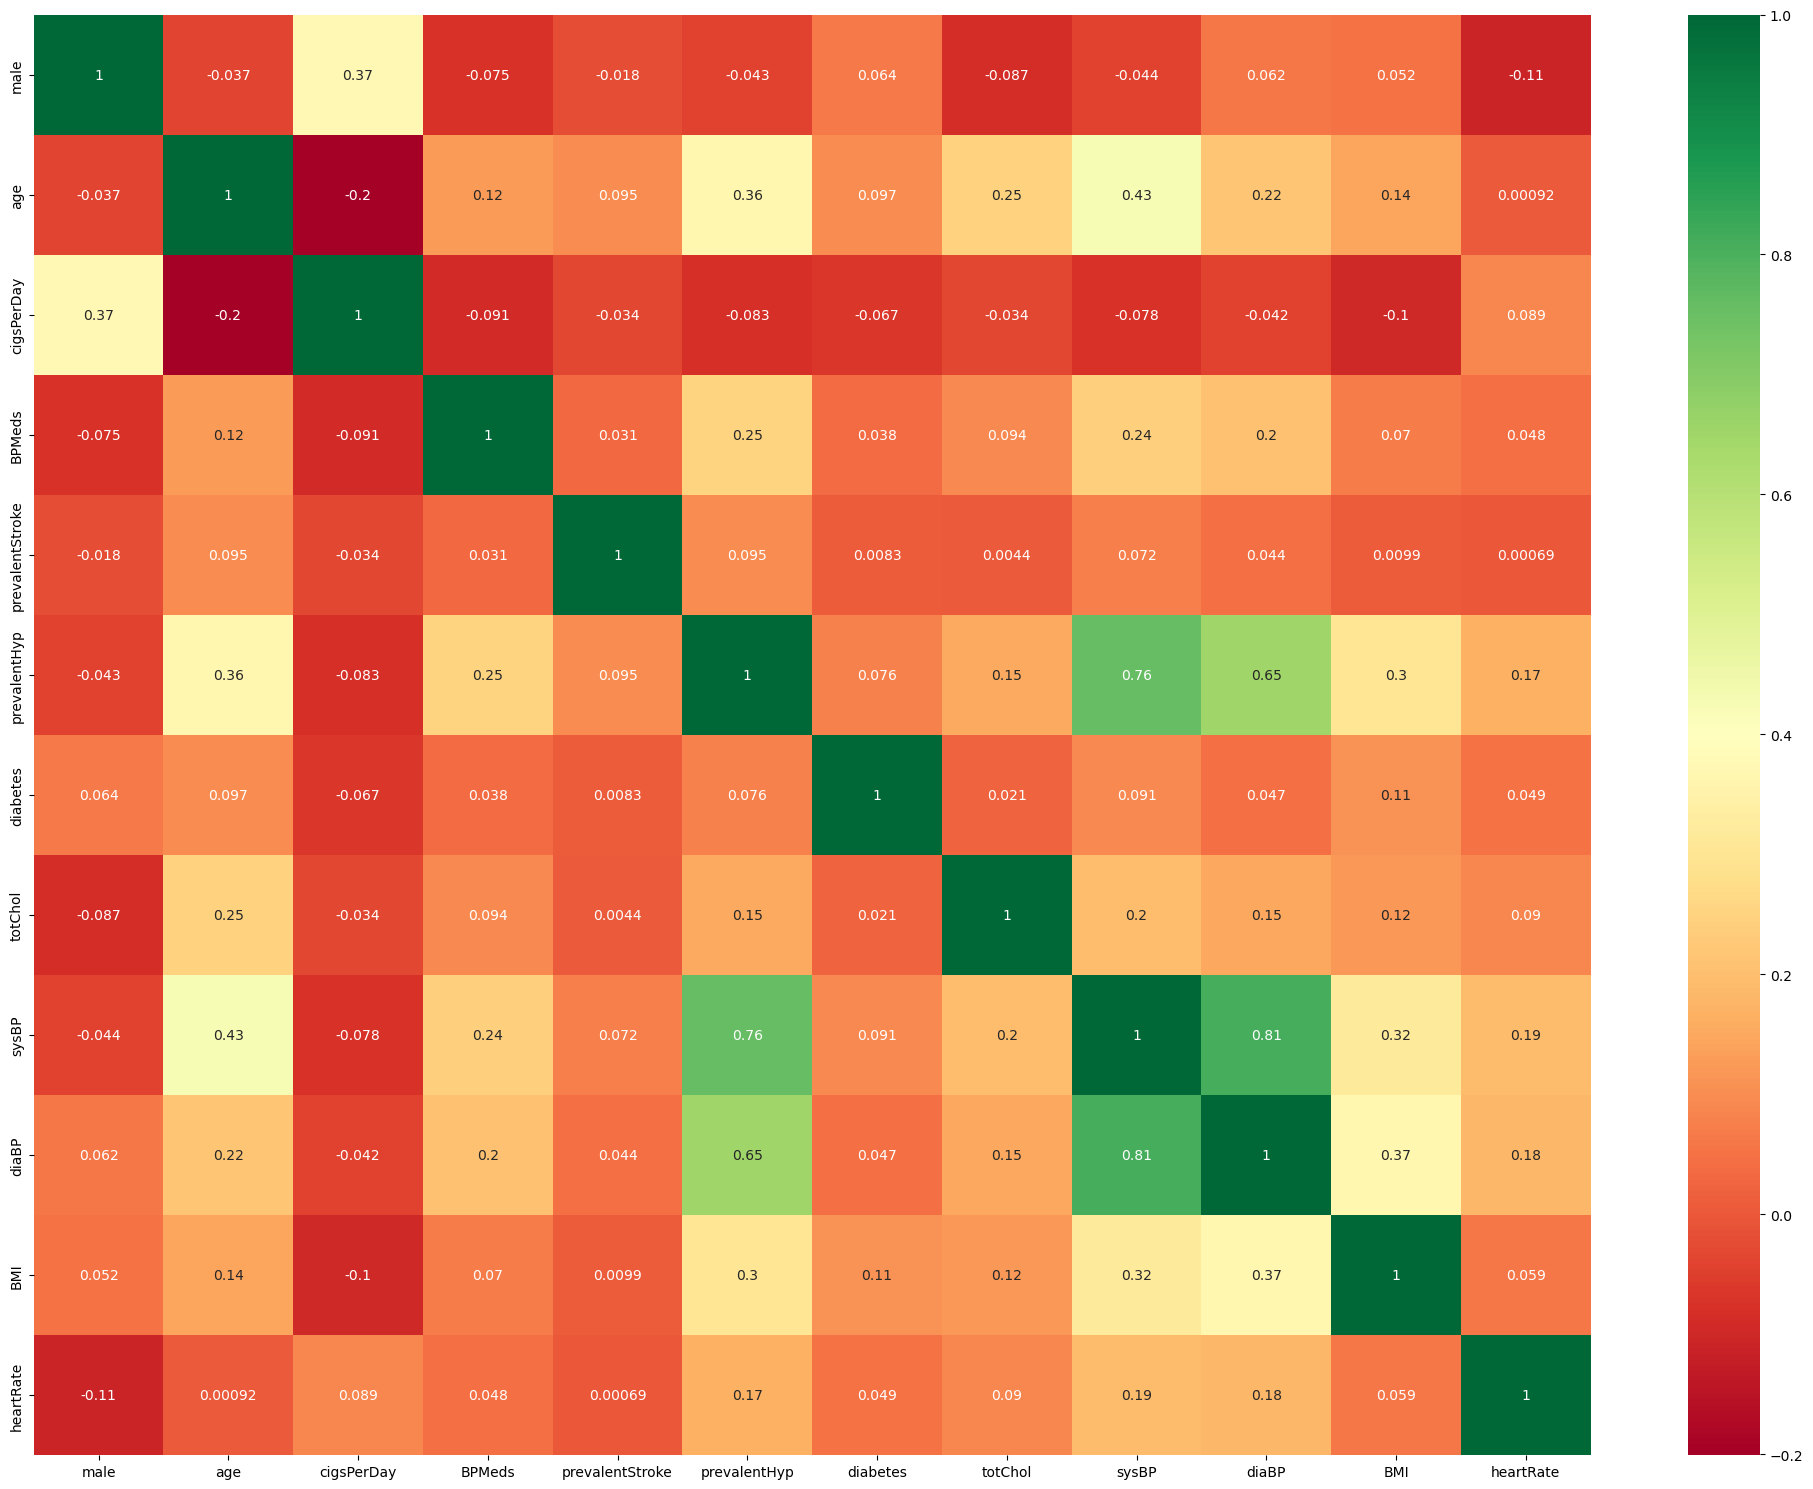

In [35]:
import seaborn as sns 
# visulize top features 
plt.figure(figsize=(20,15))
g=sns.heatmap(X_train_resampled[feature_list].corr(),annot=True, cmap='RdYlGn')

## Model Fitting

In [36]:
X_train_resampled.shape

(5674, 15)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#class weighting (more weight on minority class - class 1)
class_weight = {0: 1, 1: 1.2}

#create LogisticRegression model
lr = LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weight)

#define tunning parameter
hyperparameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

#create GridSearchCV model
grid_search = GridSearchCV(lr,hyperparameters, cv=5, scoring='roc_auc')

#fit data into grid_search
grid_search.fit(X_train_resampled[feature_list] , y_train_resampled),

#print best hyperparameters results and model score 
print(grid_search.best_params_, grid_search.best_score_)

#predict
y_proba = grid_search.predict_proba(X_test[feature_list])[:,1]

# Threshold value can be adjusted to prioritize certain types of errors over others.
# ex: customize threshold to increase sensitivity  to patience with the disease (reduce false negative)
y_pred = (y_proba>0.5).astype(int)

{'C': 1, 'penalty': 'l2'} 0.7373267278020903


In [38]:
#print out coef
grid_search.best_estimator_.coef_

array([[ 0.40216617,  3.10916702,  1.70271742,  0.31034245,  0.70605131,
         0.191075  ,  0.54695945,  1.40280328,  1.95876346,  0.52917699,
        -0.31850972, -0.39486144]])

In [39]:
#print out intercept
grid_search.best_estimator_.intercept_

array([-2.76354939])

In [40]:
pd.DataFrame(y_proba)

,0
0,0.688597
1,0.644445
2,0.615417
3,0.854168
4,0.646308
...,...
843,0.834564
844,0.715047
845,0.236950
846,0.208625


## Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

<Axes: >

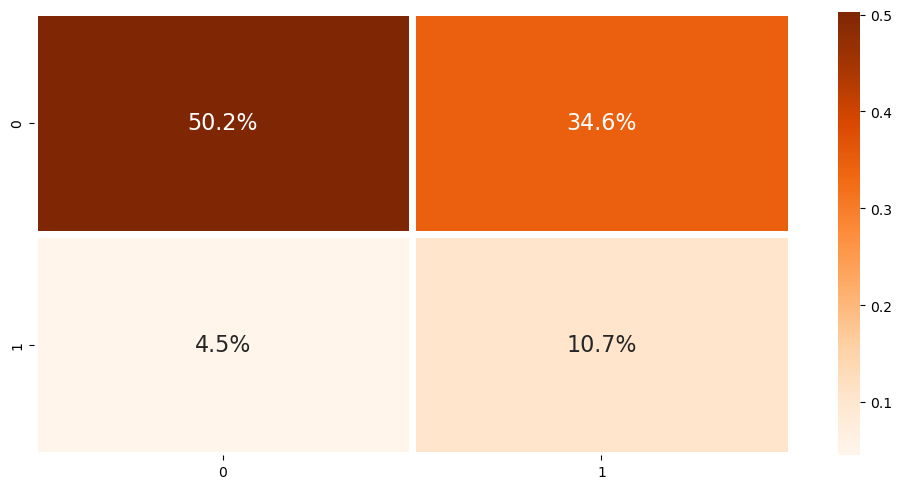

In [42]:
#Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

In [43]:
#classification report (#Precision & Recall & F1 score)
c=classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(c)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.918103,0.236979,0.60967,0.577541,0.814489
recall,0.592490,0.705426,0.60967,0.648958,0.609670
f1-score,0.720203,0.354776,0.60967,0.537489,0.664613
support,719.000000,129.000000,0.60967,848.000000,848.000000


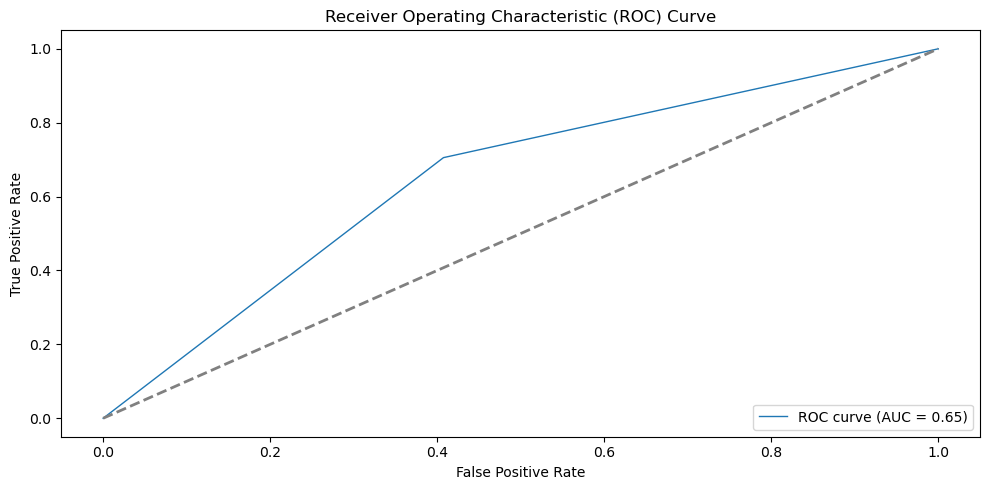

In [44]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Streamlit

In [46]:
#create a pickle file using serialization (for streamlit)
import pickle 
pickle_out = open("grid_search.pk1", "wb")
pickle.dump(grid_search, pickle_out)
pickle_out.close()